In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [9]:
Y.shape

(10,)

In [10]:
Y = Y.reshape(len(Y),1)

In [11]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [13]:
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [16]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [17]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [20]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

C:\Users\HP\anaconda3\envs\mynew\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

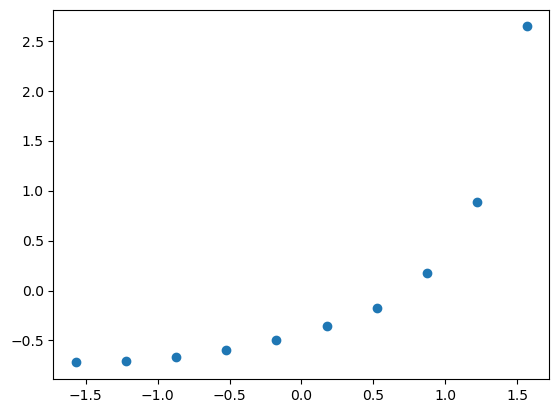

In [21]:
plt.scatter(X,Y)

In [26]:
Y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

In [27]:
Y_pred

array([[170370.0204065]])

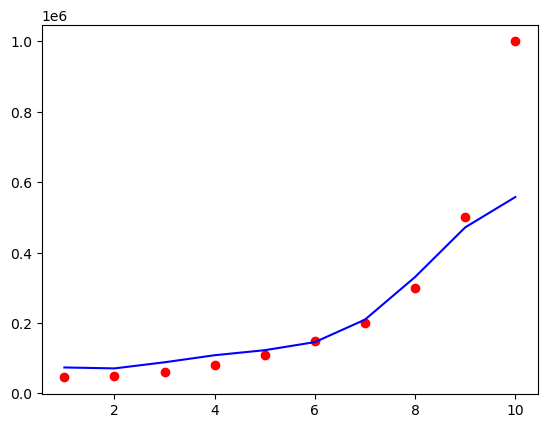

In [29]:
plt.scatter(sc_X.inverse_transform(X),sc_Y.inverse_transform(Y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')